# Hand Gesture Recognition using Leap Motion Sensor



# BUSINESS PROBLEM
Business problem is very simple, 
Lets say i own a mcdonalds store or a Dominos store which stays too busy all the time, now one day a mute couple came to my store and tried to place orders but the staff at the counter did not understand their language and mind you, store is very busy, People are highly impatient when it comes to order their food. 


My staff can't give too much time on one customer so he/she asked the mute couple to wait for a while.


Now for everyone around, it's not a big issue but for the couple it can be highly embarrassing. Being a store owner i don't want to give customers bad experience so i decided to think about this problem.


One Solution could be to train every staff member with sign language which could be very costly and impractical.


Another solution is add self ordering machines like ATM'S where anybody can come and simply place order via machine and grab their meal, this could be a good solution but I as an owner want to give those customers a special treatment.


Another solution is to add a Machine Learning System to the store which can understand the sign language and can translate sign language to ENGLISH/HINDI to the staff, this will give people a special treatment and also could be fun for other customers specially to the kids.

# CONSTRAINTS

1.Low Latency(In Real time within in few nano seconds the model should translate sign language to english language)

2.Errors can be more embarrassing for the mute/deaf people and that can affect the Brand Value.

# MACHINE LEARNING FORMULATION
This is a very simple Multi-Class classification problem where we have 26 classes (A to Z)

# DATA

Data is manually produced by Leap Motion Sensor for every alphabet, Total 26000 rows has been taken from the Sensor and every five rows represent one instance of alphabet so we have 200 rows for every alphabet

# PERFORMANCE METRIC

Now here, it is a Multi-Class Classification problem, We want High Precision and High Recall so F1 score will be a good metric and we don't have any imbalance in the data so F1_weighted will work fine.
Another metric can be multiclass logloss.

# DATA COLLECTION

LMC was connected to python to extract the values for training our model, to connect LMC with python we used LEAP.PY file given by LMC API. We imported Leap.py file from the folder provide by Leap. 

Code in leap.py shows the different libraries such as circle gestures,key tap gesture and swipe gestures were used. I have taken into consideration the finger names, bones in each finger and their start and end points.

In each frame the LMC gives us the value for each finger its position, it is distal bone co-ordinate, the palm width, palm positions and palm radius

In [1]:
#importing the libraies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats


In [2]:
#reading the data
data=pd.read_csv("BBV.CSV")

# Data 

COSMI- MIDDLE FINGER AND INDEX FINGER

COSPR-PINKY FINGER AND RING FINGER

COSRM-RING FINGER AND MIDDLE FINGER

d1-distance from palm centre to tip of thumb

d2-distance from palm centre to tip of index finger

d3-distance from palm centre to tip of middle finger

d4-distance from palm centre to tip of ring finger

d5-distance from palm centre to tip of pinky finger

d6-distance from pinky finger to ring finger

d7-distance from ring finger to middle finger

d8-distance from middle finger to index finger


In [3]:
data.head(20)



cosmi     cospr     cosrm         d1         d2         d3         d4  \
0   0.981020  0.984024  0.981728  14.588637  36.743969  25.098079  23.956453   
1   0.989697  0.986576  0.980025  48.687866  49.341249  45.003977  37.633224   
2   0.981275  0.994738  0.985409  58.846428  48.782098  44.554866  36.675178   
3   0.975888  0.992271  0.988816  54.662181  43.004875  38.452685  32.377231   
4   0.981020  0.984024  0.981728  14.588637  36.743969  25.098079  23.956453   
5   0.989697  0.986576  0.980025  48.687866  49.341249  45.003977  37.633224   
6   0.981275  0.994738  0.985409  58.846428  48.782098  44.554866  36.675178   
7   0.975888  0.992271  0.988816  54.662181  43.004875  38.452685  32.377231   
8   0.981020  0.984024  0.981728  14.588637  36.743969  25.098079  23.956453   
9   0.989697  0.986576  0.980025  48.687866  49.341249  45.003977  37.633224   
10  0.981275  0.994738  0.985409  58.846428  48.782098  44.554866  36.675178   
11  0.975888  0.992271  0.988816  54.662181  43.004875  38.452685  32.377231   
12  0.981020  0.984024  0.981728  14.588637  36.743969  25.098079  23.956453   
13  0.989697  0.986576  0.980025  48.687866  49.341249  45.003977  37.633224   
14  0.981275  0.994738  0.985409  58.846428  48.782098  44.554866  36.675178   
15  0.975888  0.992271  0.988816  54.662181  43.004875  38.452685  32.377231   
16  0.981020  0.984024  0.981728  14.588637  36.743969  25.098079  23.956453   
17  0.989697  0.986576  0.980025  48.687866  49.341249  45.003977  37.633224   
18  0.981275  0.994738  0.985409  58.846428  48.782098  44.554866  36.675178   
19  0.975888  0.992271  0.988816  54.662181  43.004875  38.452685  32.377231   

           d5         d6         d7         d8 Alphabet  
0   43.922804  19.917515  20.849653  20.831616        A  
1   32.341337  16.177564  15.222451  10.290461        A  
2   40.557811  15.352751  10.486557  11.078349        A  
3   55.106956  13.719385  10.190925  12.601386        A  
4   43.922804  19.917515  20.849653  20.831616        A  
5   32.341337  16.177564  15.222451  10.290461        A  
6   40.557811  15.352751  10.486557  11.078349        A  
7   55.106956  13.719385  10.190925  12.601386        A  
8   43.922804  19.917515  20.849653  20.831616        A  
9   32.341337  16.177564  15.222451  10.290461        A  
10  40.557811  15.352751  10.486557  11.078349        A  
11  55.106956  13.719385  10.190925  12.601386        A  
12  43.922804  19.917515  20.849653  20.831616        A  
13  32.341337  16.177564  15.222451  10.290461        A  
14  40.557811  15.352751  10.486557  11.078349        A  
15  55.106956  13.719385  10.190925  12.601386        A  
16  43.922804  19.917515  20.849653  20.831616        A  
17  32.341337  16.177564  15.222451  10.290461        A  
18  40.557811  15.352751  10.486557  11.078349        A  
19  54.346619  13.719385  10.190925  12.601386        A

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cosmi     5200 non-null   float64
 1   cospr     5200 non-null   float64
 2   cosrm     5200 non-null   float64
 3   d1        5200 non-null   float64
 4   d2        5200 non-null   float64
 5   d3        5200 non-null   float64
 6   d4        5200 non-null   float64
 7   d5        5200 non-null   float64
 8   d6        5200 non-null   float64
 9   d7        5200 non-null   float64
 10  d8        5200 non-null   float64
 11  Alphabet  5200 non-null   object 
dtypes: float64(11), object(1)
memory usage: 487.6+ KB


In [5]:
data.columns


Index(['cosmi', 'cospr', 'cosrm', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7',
       'd8', 'Alphabet'],
      dtype='object')

In [6]:
data.shape

(5200, 12)

In [7]:
data['Alphabet'].value_counts()

O    200
S    200
Q    200
U    200
N    200
E    200
D    200
F    200
G    200
P    200
C    200
H    200
T    200
K    200
B    200
M    200
L    200
V    200
X    200
R    200
W    200
Z    200
Y    200
J    200
I    200
A    200
Name: Alphabet, dtype: int64

EVERY ALPHABET HAS 200 ROWS, SO THERE IS NO IMBALANCE OF DATA

In [8]:
#lets label Alphabets to Numerical values
data1=data.replace({'A':1, 'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8,'I':9,'J':10,'K':11,'L':12,'M':13,'N':14,'O':15,'P':16,'Q':17,'R':18,'S':19,'T':20,'U':21,'V':22,'W':23,'X':24,'Y':25,'Z':26})
data1.head()

cosmi     cospr     cosrm         d1         d2         d3         d4  \
0  0.981020  0.984024  0.981728  14.588637  36.743969  25.098079  23.956453   
1  0.989697  0.986576  0.980025  48.687866  49.341249  45.003977  37.633224   
2  0.981275  0.994738  0.985409  58.846428  48.782098  44.554866  36.675178   
3  0.975888  0.992271  0.988816  54.662181  43.004875  38.452685  32.377231   
4  0.981020  0.984024  0.981728  14.588637  36.743969  25.098079  23.956453   

          d5         d6         d7         d8  Alphabet  
0  43.922804  19.917515  20.849653  20.831616         1  
1  32.341337  16.177564  15.222451  10.290461         1  
2  40.557811  15.352751  10.486557  11.078349         1  
3  55.106956  13.719385  10.190925  12.601386         1  
4  43.922804  19.917515  20.849653  20.831616         1

# EXPLORATORY DATA ANAYSIS

Exploring and visualizing the data:
1. Univariate Analysis
2. Bivariate Analysis


0.9666596308669233
0.991121565
0.999984744
0.9801810759999999
0.9958696359999999
0.015688559999999963


C:\Users\DELL NOTEBOOK\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


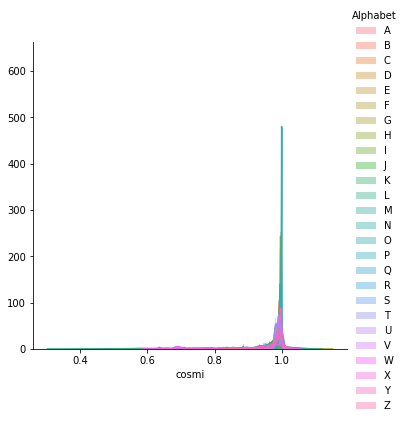

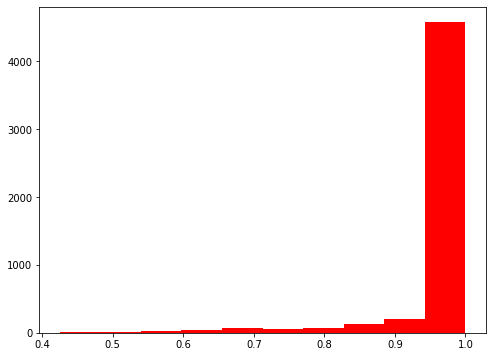

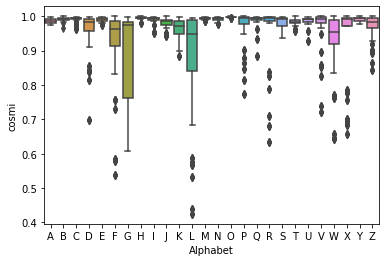

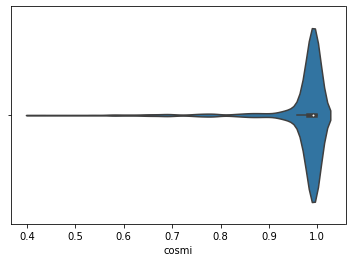

In [77]:
#univariate analysis
#cosmi

a=np.mean(data1['cosmi'])#mean
print(a)

b=np.median(data1['cosmi'])#median
print(b)

c=max(data1['cosmi']) #maximum value
print(c)

d=np.percentile(data1['cosmi'],25)#25th percentile
print(d)

e=np.percentile(data1['cosmi'],75)#75th percentile
print(e)

f=scipy.stats.iqr(data1['cosmi']) #interqunatile range
print(f)


sns.FacetGrid(data, hue='Alphabet',size=5)\
.map(sns.distplot, 'cosmi',kde='True').add_legend()
plt.show()


plt.figure(figsize=(8,6))
plt.hist(data['cosmi'],facecolor='r')

plt.show()

sns.boxplot(x='Alphabet', y='cosmi', data=data)
plt.show()

sns.violinplot(x='cosmi', data=data)
plt.show()

# observation

1. 75% of the total cosmi values lie below 0.9958696359999999
2. 25% of the total cosmi values lie below 0.9801810759999999
3. 50% values of cosmi lie between 0.9958696359999999 to 0.9801810759999999
4. Interquantile range is very very small.
5. We know that each alphabet has 200 rows, so we can say most alphabets has
   cosmi (cosine distnace between middle and index finger is between 0.98 to      0.99)
6. From the box plot also , it is clear that if we take cosmi as a feature into    consideration, we will be only able to classify alphabets like D,F,G,L,W.
   Rest all are quite similar and very difficult to differeniate.
   
7. Violin plot combines the pdf and box plot, from the vioin plot it is very      much clear that most of the values of cosmi lies between 0.98 to 0.99

0.9805886142734571
0.9932241960000001
0.9999900759999999
0.987696502
0.9968337740000001
0.9984799040000001
0.00913727200000003


C:\Users\DELL NOTEBOOK\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


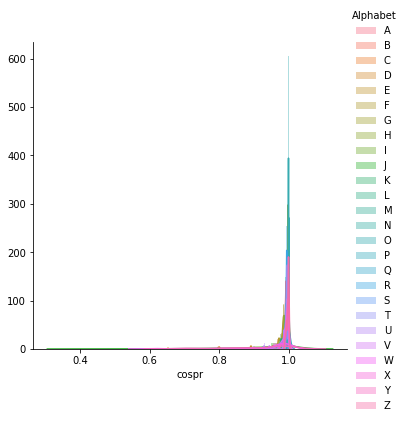

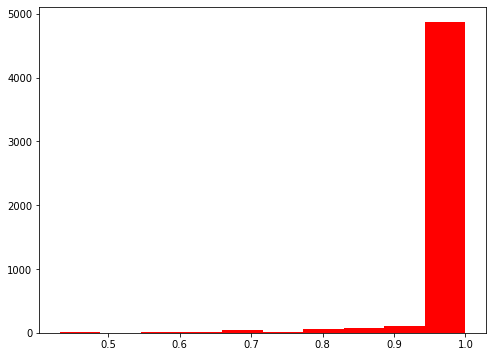

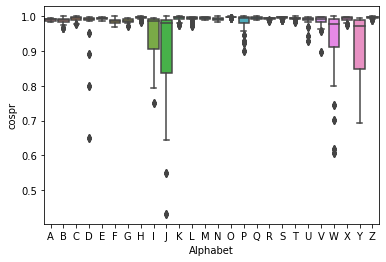

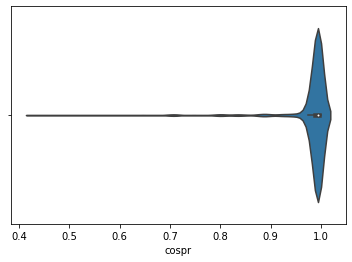

In [90]:
#cospr

a=np.mean(data1['cospr'])#mean
print(a)

b=np.median(data1['cospr'])#median
print(b)

c=max(data1['cospr']) #maximum value
print(c)

d=np.percentile(data1['cospr'],25)#25th percentile
print(d)

e=np.percentile(data1['cospr'],75)#75th percentile
print(e)

i=np.percentile(data1['cospr'],90)#90th percentile
print(i) 

f=scipy.stats.iqr(data1['cospr']) #interqunatile range
print(f)


sns.FacetGrid(data, hue='Alphabet',size=5)\
.map(sns.distplot, 'cospr',kde='True').add_legend()
plt.show()


plt.figure(figsize=(8,6))
plt.hist(data['cospr'],facecolor='r')

plt.show()

sns.boxplot(x='Alphabet', y='cospr', data=data)
plt.show()

sns.violinplot(x='cospr', data=data)
plt.show()

# observation

1. 75% of the total cospr values lie below 0.9968337740000001
2. 25% of the total cospr values lie below 0.987696502
3. 50% values of cospr lie between 0.9968337740000001 to 0.987696502
4. Interquantile range is very very small.(0.0091)
5. We know that each alphabet has 200 rows, so we can say most alphabets has
   cospr (cosine distnace between pinky and ring finger is between 0.987 to        0.996)
6. From the box plot also ,cospr as a feature,alphabets J,I,W,Y like have a        wide range of values, other alphabets range lie very close to 0.9
 
7. Violin plot combines the pdf and box plot, from the vioin plot it is very      much clear that most of the values of cosmi lies between 0.987 to 0.996



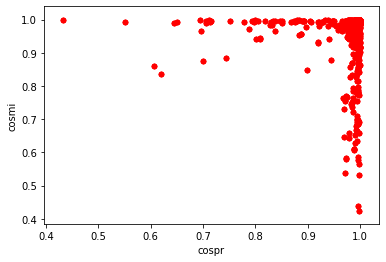

In [87]:
#SCATTER PLOT BETWEEN COSMI AND COSPR
data.plot.scatter(x='cospr', y='cosmi',c='red')
plt.show()

# observation

 1. After 0.9 of cospr, we can see that for same values of cospr, we have           different values of cosmi, in a very short interval we have different           values of cosmi and there are also rows where these values are almost same.

0.967606423845385
0.990102809
0.9999985999999998
0.98277232
0.995422645
0.012650324999999962


C:\Users\DELL NOTEBOOK\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


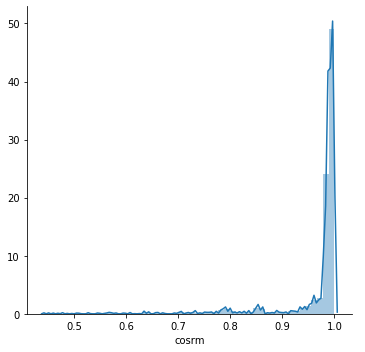

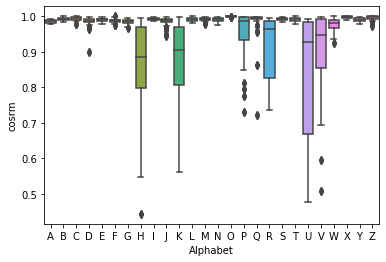

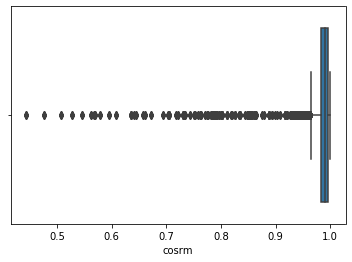

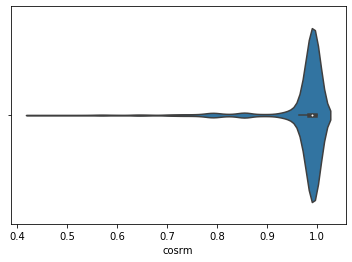

In [99]:
#cosrm

a=np.mean(data1['cosrm'])#mean
print(a)

b=np.median(data1['cosrm'])#median
print(b)

c=max(data1['cosrm']) #maximum value
print(c)

d=np.percentile(data1['cosrm'],25)#25th percentile
print(d)

e=np.percentile(data1['cosrm'],75)#75th percentile
print(e)

f=scipy.stats.iqr(data1['cosrm']) #interqunatile range
print(f)


sns.FacetGrid(data,size=5)\
.map(sns.distplot, 'cosrm',kde='True').add_legend()
plt.show()

sns.boxplot(x='Alphabet', y='cosrm', data=data)
plt.show()

sns.boxplot(x=data['cosrm'])
plt.show()

sns.violinplot(x='cosrm', data=data)
plt.show()

# observation

1. 75% of the total cosrm values lie below 0.995422645
2. 25% of the total cosrm values lie below 0.98277232
3. 50% values of cosrm lie between 0.995422645  to 0.98277232
4. Interquantile range is very very small.(0.012650324999999962)
5. We know that each alphabet has 200 rows, so we can say most alphabets has
   cosrm (cosine distnace between ring finger and middle finger is between        0.982 to 0.995)
6. From the box plot, we can see some variation in some alphabets like            U,V,R,W,P. In previous box plots, they had a very restricted range normally    close to 0.9.
7. Violin plot combines the pdf and box plot, from the vioin plot it is very      much clear that most of the values of cosrm lies between 0.982 to 0.995





56.61574780942318
55.686688285
130.10100549999999
40.1064773525
73.896803165
33.790325812499994


C:\Users\DELL NOTEBOOK\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


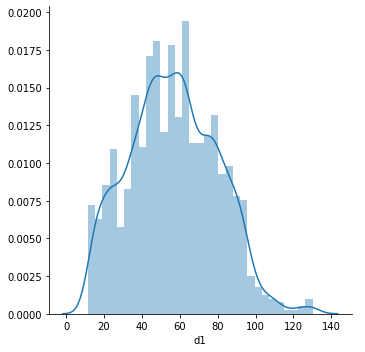

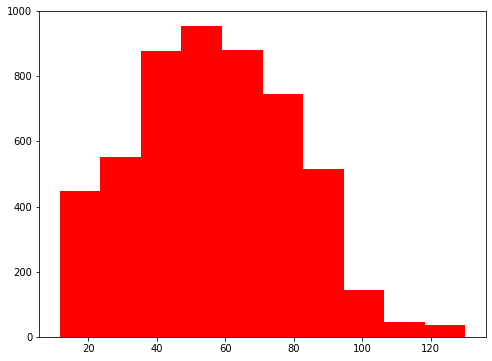

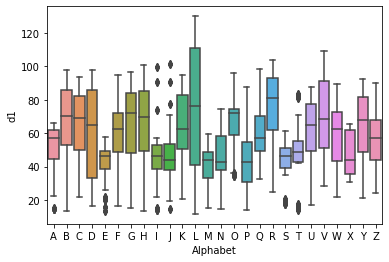

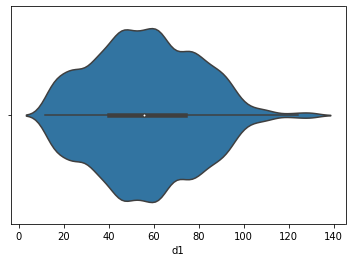

In [96]:
#d1
#d1-distance from palm centre to tip of thumb


a=np.mean(data1['d1'])#mean
print(a)

b=np.median(data1['d1'])#median
print(b)

c=max(data1['d1']) #maximum value
print(c)

d=np.percentile(data1['d1'],25)#25th percentile
print(d)

e=np.percentile(data1['d1'],75)#75th percentile
print(e)

f=scipy.stats.iqr(data1['d1']) #interqunatile range
print(f)


sns.FacetGrid(data,size=5)\
.map(sns.distplot, 'd1').add_legend()
plt.show()


plt.figure(figsize=(8,6))
plt.hist(data['d1'],facecolor='r')

plt.show()

sns.boxplot(x='Alphabet', y='d1', data=data)
plt.show()

#sns.boxplot(data['d1'])
#plt.show()

sns.violinplot(x='d1', data=data)
plt.show()

# observation

1. 75% of the total d1 values lie below 73.8968

2. 25% of the total d1 values lie below 40.1064

3. 50% values of d1 lie between  73.8968 to 40.1064

4. Interquantile range is 33.790325812499994

5. From the box plot , we can see every alphabet has a different range of d1,we can see alphabets like E,I ,J,S AND T have almost same d1 range, we can assume the d1(distance between palm and tip of thumb) in these alphabets are quite similar.

6. Violin plot combines the pdf and box plot, from the vioin plot it is very much clear that most of the values of d1 values lies between 40 to 75 and there are very less values between after 100


53.805441120826885
49.11791704
140.92396269999998
35.6709169825
66.35314643
30.682229447499992


C:\Users\DELL NOTEBOOK\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


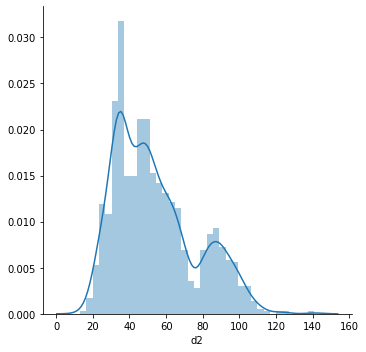

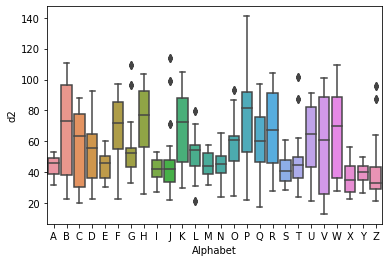

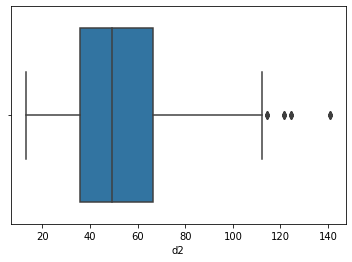

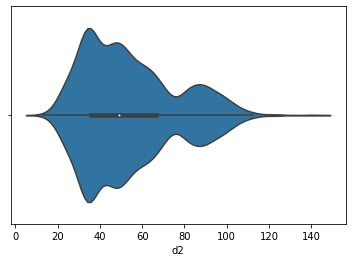

In [101]:
# d2
#d2-distance from palm centre to tip of index finger

a=np.mean(data1['d2'])#mean
print(a)

b=np.median(data1['d2'])#median
print(b)

c=max(data1['d2']) #maximum value
print(c)

d=np.percentile(data1['d2'],25)#25th percentile
print(d)

e=np.percentile(data1['d2'],75)#75th percentile
print(e)

f=scipy.stats.iqr(data1['d2']) #interqunatile range
print(f)


sns.FacetGrid(data,size=5)\
.map(sns.distplot, 'd2').add_legend()
plt.show()

sns.boxplot(x='Alphabet', y='d2', data=data)
plt.show()

sns.boxplot(data['d2'])
plt.show()

sns.violinplot(x='d2', data=data)
plt.show()

# observation


1. 75% of the total d2 values lie below 66.35314643

2. 25% of the total d2 values lie below 35.6709169825

3. 50% values of d2 lie between 66.35314643 to 35.6709169825

4. Interquantile range is 30.682229447499992

5. From the box plot , we can see every alphabet has a different range of d2,we can see alphabets like A,E,G,I ,J,N,S, T,X,Y,Z have almost same d2 range, we can assume the d2(distance from palm centre to tip of index finger ) in these alphabets are quite similar.

6. Violin plot combines the pdf and box plot, from the vioin plot it is very much clear that most of the values of d2 values lies between 35 to 67 and there are very less values between after 100



C:\Users\DELL NOTEBOOK\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


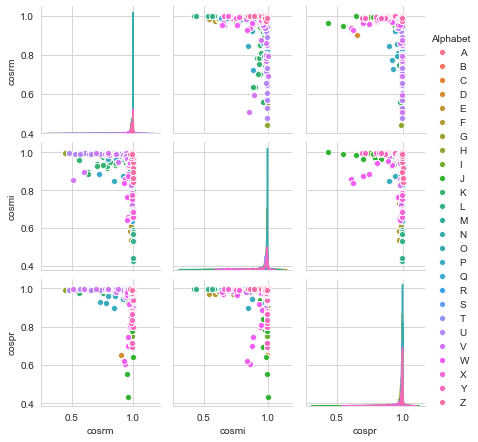

In [110]:
#lets plot the pairplot between the cosine distances between fingers

x=data[["cosrm", "cosmi", "cospr", "Alphabet"]]

sns.set_style("whitegrid");
sns.pairplot(x,hue="Alphabet", size=2);
plt.show()

# observation

Here we have mainly 3 plots, 
1. cosmi vs cosrm- very clear clusters of color are there when it comes to alphabet after H, here picture is not clear for Alphabets A to H, very few points can be seen.
   

2. cosmi vs cospr- Here things get a bit complex, green dots are spread all over( from J to P), here from alphabet N to U, there are very less points.

3. cospr vs cosrm- Very few points for alphabet A to H, otherwise clusters are forming.



C:\Users\DELL NOTEBOOK\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


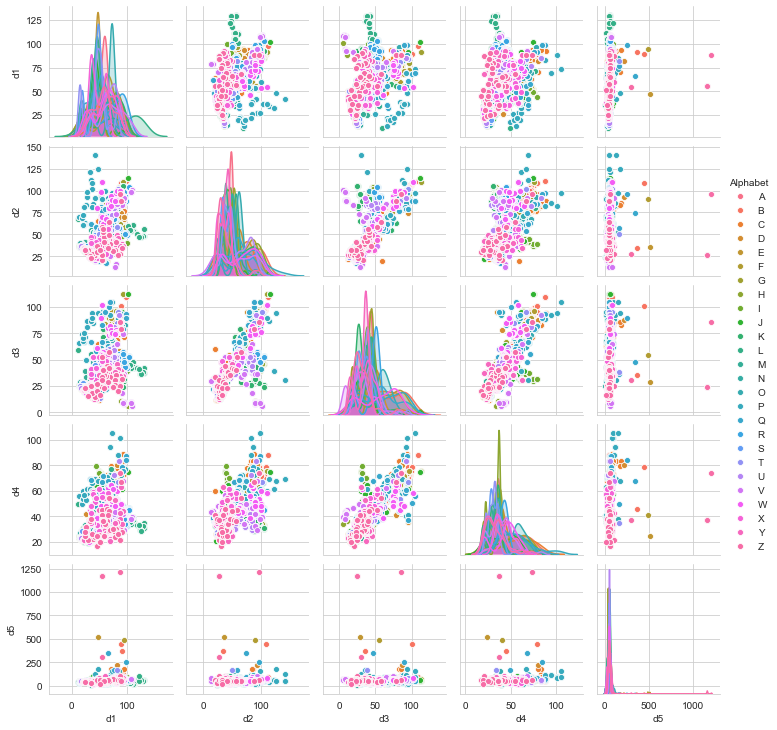

In [112]:
#lets plot scatter plot between distances between the centre 
#And tip of fingers(d1,d2,d3,d4)

y=data[["d1", "d2", "d3", "d4","d5" ,"Alphabet"]]

sns.set_style("whitegrid");
sns.pairplot(y,hue="Alphabet", size=2);
plt.show()

C:\Users\DELL NOTEBOOK\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


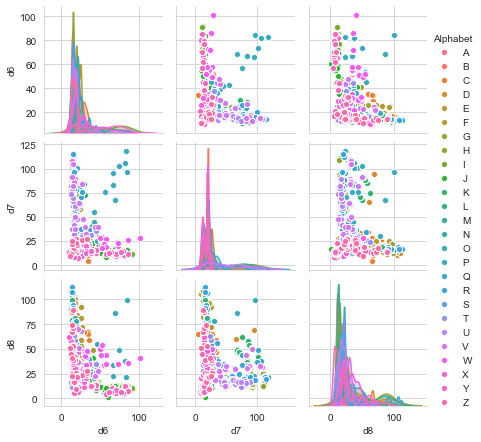

In [113]:
#lets plot scatter plot between distances between the tips of fingers

z=data[["d6", "d7", "d8", "Alphabet"]]

sns.set_style("whitegrid");
sns.pairplot(z,hue="Alphabet", size=2);
plt.show()

42.776711528846356
40.32177794
112.39531470000001
26.89904224
50.90140165
24.002359409999997


C:\Users\DELL NOTEBOOK\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


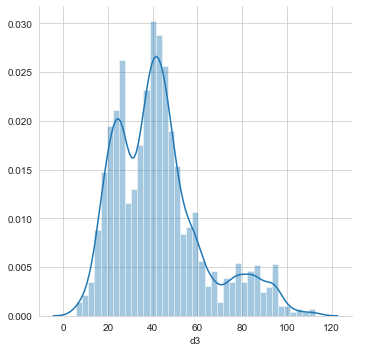

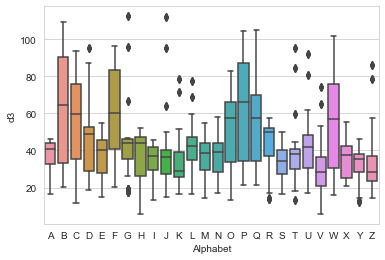

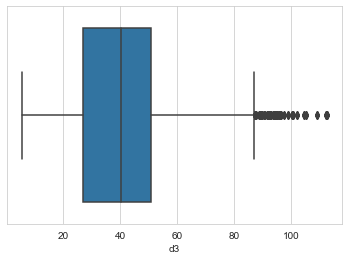

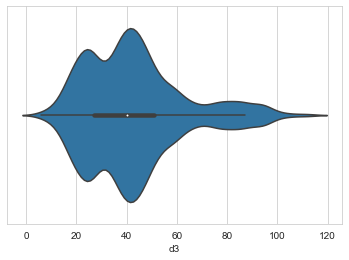

In [114]:
# d3
#d3-distance from palm centre to tip of middle finger

a=np.mean(data1['d3'])#mean
print(a)

b=np.median(data1['d3'])#median
print(b)

c=max(data1['d3']) #maximum value
print(c)

d=np.percentile(data1['d3'],25)#25th percentile
print(d)

e=np.percentile(data1['d3'],75)#75th percentile
print(e)

f=scipy.stats.iqr(data1['d3']) #interqunatile range
print(f)


sns.FacetGrid(data,size=5)\
.map(sns.distplot, 'd3').add_legend()
plt.show()

sns.boxplot(x='Alphabet', y='d3', data=data)
plt.show()

sns.boxplot(data['d3'])
plt.show()

sns.violinplot(x='d3', data=data)
plt.show()

# Observation

We can a variation in boxplots, this features can be useful in prediction

40.589975453678676
37.57540902
105.31889960000001
30.35526113
47.9925682
17.637307070000002


C:\Users\DELL NOTEBOOK\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


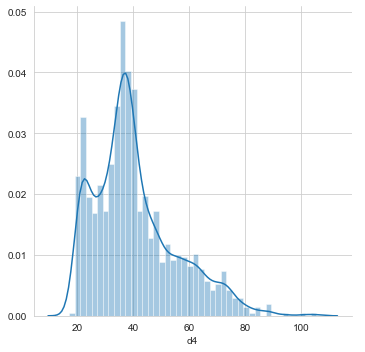

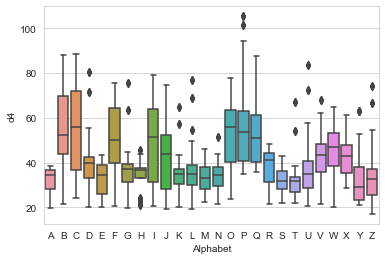

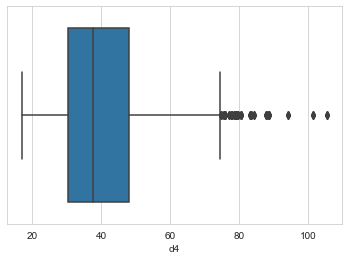

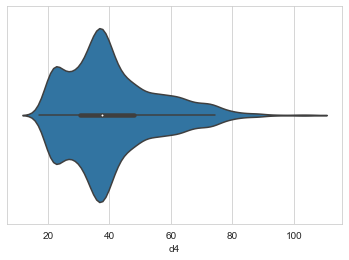

In [115]:
#d4

a=np.mean(data1['d4'])#mean
print(a)

b=np.median(data1['d4'])#median
print(b)

c=max(data1['d4']) #maximum value
print(c)

d=np.percentile(data1['d4'],25)#25th percentile
print(d)

e=np.percentile(data1['d4'],75)#75th percentile
print(e)

f=scipy.stats.iqr(data1['d4']) #interqunatile range
print(f)


sns.FacetGrid(data,size=5)\
.map(sns.distplot, 'd4').add_legend()
plt.show()

sns.boxplot(x='Alphabet', y='d4', data=data)
plt.show()

sns.boxplot(data['d4'])
plt.show()

sns.violinplot(x='d4', data=data)
plt.show()

# Observation

This feature also had a variety of boxplots means there is a good percentile difference, this feature can also be useful

54.03482434850193
52.68815708
1209.518587
44.2834546375
60.19374407
15.9102894325


C:\Users\DELL NOTEBOOK\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


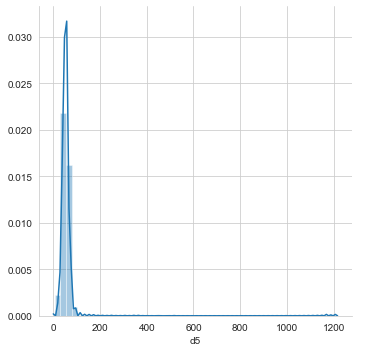

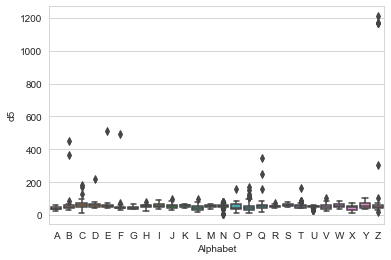

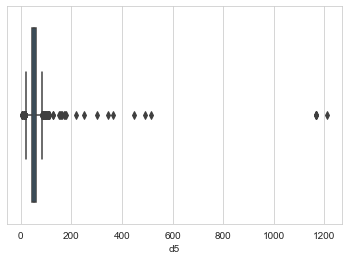

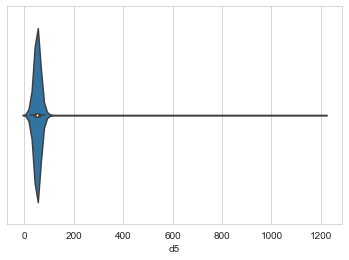

In [116]:
#d5

a=np.mean(data1['d5'])#mean
print(a)

b=np.median(data1['d5'])#median
print(b)

c=max(data1['d5']) #maximum value
print(c)

d=np.percentile(data1['d5'],25)#25th percentile
print(d)

e=np.percentile(data1['d5'],75)#75th percentile
print(e)

f=scipy.stats.iqr(data1['d5']) #interqunatile range
print(f)


sns.FacetGrid(data,size=5)\
.map(sns.distplot, 'd5').add_legend()
plt.show()

sns.boxplot(x='Alphabet', y='d5', data=data)
plt.show()

sns.boxplot(data['d5'])
plt.show()

sns.violinplot(x='d5', data=data)
plt.show()

# Observation

This feature is not showing any good result, Percentiles are too close, We will se if we can avaoid this feature, this feature is not adding much value in classifying

23.989944135049978
19.72983159
100.96667540000001
16.199290419999997
23.47291923
7.273628810000002


C:\Users\DELL NOTEBOOK\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


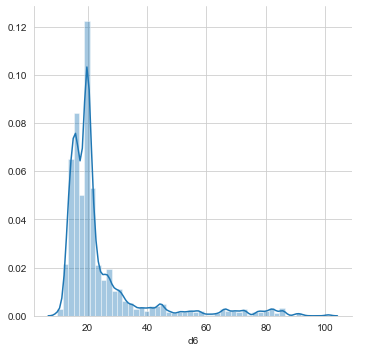

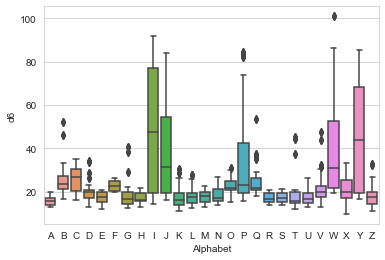

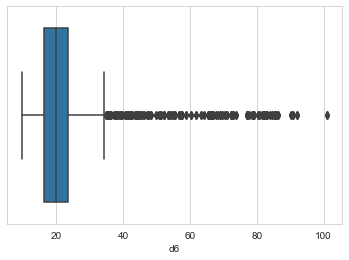

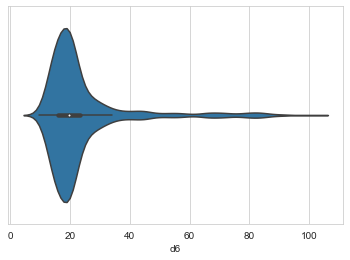

In [118]:
# d6

a=np.mean(data1['d6'])#mean
print(a)

b=np.median(data1['d6'])#median
print(b)

c=max(data1['d6']) #maximum value
print(c)

d=np.percentile(data1['d6'],25)#25th percentile
print(d)

e=np.percentile(data1['d6'],75)#75th percentile
print(e)

f=scipy.stats.iqr(data1['d6']) #interqunatile range
print(f)


sns.FacetGrid(data,size=5)\
.map(sns.distplot, 'd6').add_legend()
plt.show()

sns.boxplot(x='Alphabet', y='d6', data=data)
plt.show()

sns.boxplot(data['d6'])
plt.show()

sns.violinplot(x='d6', data=data)
plt.show()

# observation

This feature is showing good signs, clearly percentile difference between (i,j,p) and (a,b,c and many)

27.47525834146556
20.74999971
117.9369949
16.401633689999997
25.0729253125
8.671291622500004


C:\Users\DELL NOTEBOOK\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


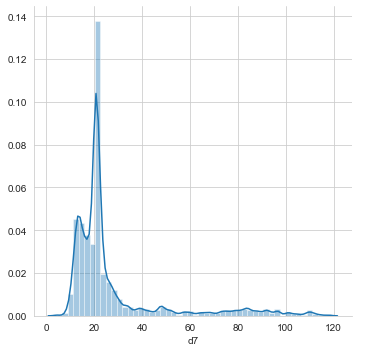

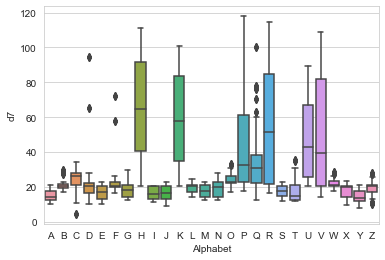

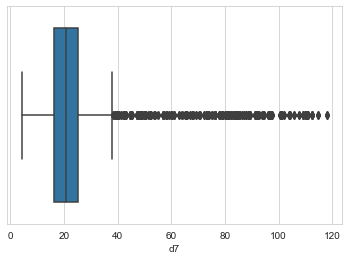

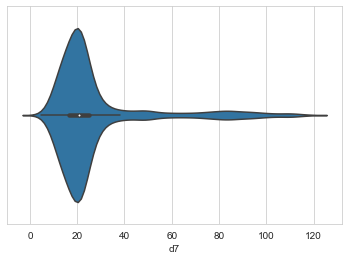

In [120]:
#d7

a=np.mean(data1['d7'])#mean
print(a)

b=np.median(data1['d7'])#median
print(b)

c=max(data1['d7']) #maximum value
print(c)

d=np.percentile(data1['d7'],25)#25th percentile
print(d)

e=np.percentile(data1['d7'],75)#75th percentile
print(e)

f=scipy.stats.iqr(data1['d7']) #interqunatile range
print(f)


sns.FacetGrid(data,size=5)\
.map(sns.distplot, 'd7').add_legend()
plt.show()

sns.boxplot(x='Alphabet', y='d7', data=data)
plt.show()

sns.boxplot(data['d7'])
plt.show()

sns.violinplot(x='d7', data=data)
plt.show()

# observation

27.78213081190575
21.16142848
112.16353899999999
15.598837387500001
30.50945202
14.9106146325


C:\Users\DELL NOTEBOOK\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


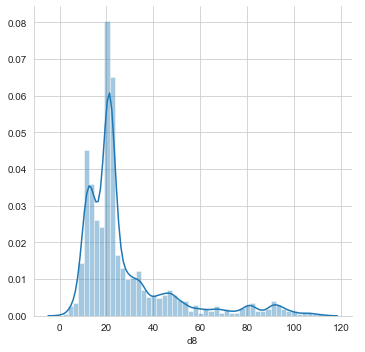

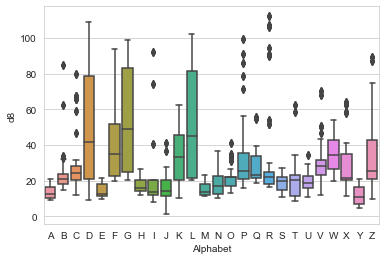

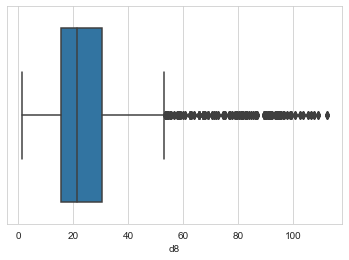

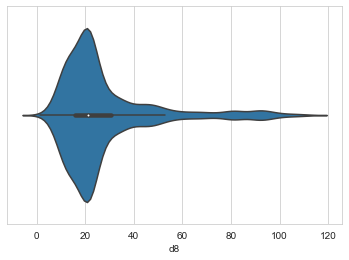

In [121]:
#d8

a=np.mean(data1['d8'])#mean
print(a)

b=np.median(data1['d8'])#median
print(b)

c=max(data1['d8']) #maximum value
print(c)

d=np.percentile(data1['d8'],25)#25th percentile
print(d)

e=np.percentile(data1['d8'],75)#75th percentile
print(e)

f=scipy.stats.iqr(data1['d8']) #interqunatile range
print(f)


sns.FacetGrid(data,size=5)\
.map(sns.distplot, 'd8').add_legend()
plt.show()

sns.boxplot(x='Alphabet', y='d8', data=data)
plt.show()

sns.boxplot(data['d8'])
plt.show()

sns.violinplot(x='d8', data=data)
plt.show()

# observation

In [214]:
#correlation between variables
data.corr()


cosmi     cospr     cosrm        d1        d2        d3        d4  \
cosmi  1.000000 -0.000861 -0.022274 -0.337050 -0.086727 -0.115478 -0.037140   
cospr -0.000861  1.000000 -0.025945 -0.045416 -0.011138 -0.068980 -0.194083   
cosrm -0.022274 -0.025945  1.000000 -0.309784 -0.488386 -0.045788  0.008852   
d1    -0.337050 -0.045416 -0.309784  1.000000  0.602820  0.457364  0.432990   
d2    -0.086727 -0.011138 -0.488386  0.602820  1.000000  0.732138  0.591890   
d3    -0.115478 -0.068980 -0.045788  0.457364  0.732138  1.000000  0.808023   
d4    -0.037140 -0.194083  0.008852  0.432990  0.591890  0.808023  1.000000   
d5     0.011544 -0.045065 -0.013439  0.129055  0.096802  0.092137  0.129470   
d6     0.110376 -0.671478  0.096055  0.015784  0.133352  0.241876  0.444239   
d7     0.101547  0.120841 -0.804000  0.345941  0.635380  0.146437  0.099082   
d8    -0.740350  0.119540  0.011064  0.473812  0.204868  0.163090  0.094264   

             d5        d6        d7        d8  
cosmi  0.011544  0.110376  0.101547 -0.740350  
cospr -0.045065 -0.671478  0.120841  0.119540  
cosrm -0.013439  0.096055 -0.804000  0.011064  
d1     0.129055  0.015784  0.345941  0.473812  
d2     0.096802  0.133352  0.635380  0.204868  
d3     0.092137  0.241876  0.146437  0.163090  
d4     0.129470  0.444239  0.099082  0.094264  
d5     1.000000  0.098416  0.036524  0.033028  
d6     0.098416  1.000000 -0.083260 -0.145891  
d7     0.036524 -0.083260  1.000000  0.006786  
d8     0.033028 -0.145891  0.006786  1.000000

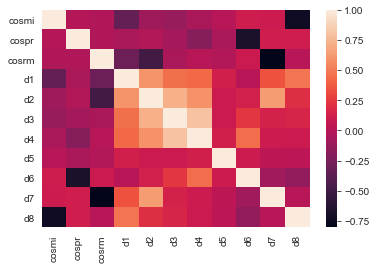

In [215]:
#lets plot the correlation matrix
corr = data.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Text(0.5, 1, 'Correlation Heatmap')

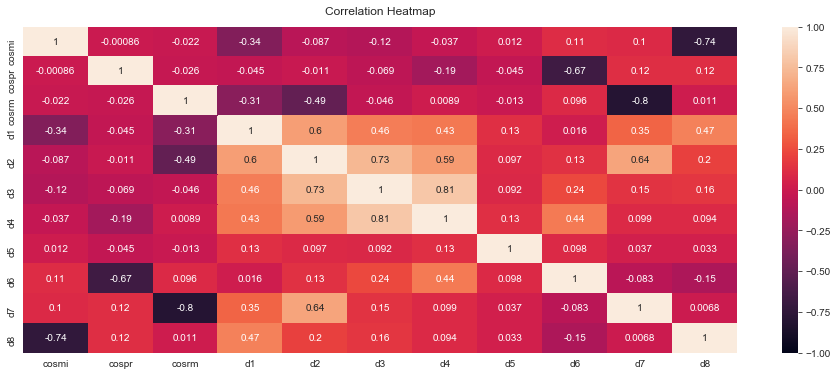

In [212]:
#can we combine heat maps and their actually correlation values?

#this plot i have reffered from 
#https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e#:~:text=))heatmap%20%3D%20sns.-,heatmap(dataframe.,18%7D%2C%20pad%3D16)%3B

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

# observation

There are few feature which are strongly correlated(>0.7 or <-0.7) like (cosmi and d8), (d7 and cosrm), (d3 and d2)
,(d4 and d3)
other than these all the feature are not correlated.

# Dimension Reduction

1. Dimension reduction is a very wonderful technique to visualize data in lower
   dimension. 
2. Mainly there are two techniques which i gonna use in this project that is
   1. PCA(stands for Principle component analysis)
      The idea is very simply, we want to find the direction f' such that             variance of projection of xi's over f' is maximum, here xi's are the data       points.
   2. T-sne is a complex idea, but intutively it tries to embedd higher               dimensional points to lower dimensions so that its easy to visualize           them.
      TSNE Stands for t distribution stochastic neighbourhood embedding.



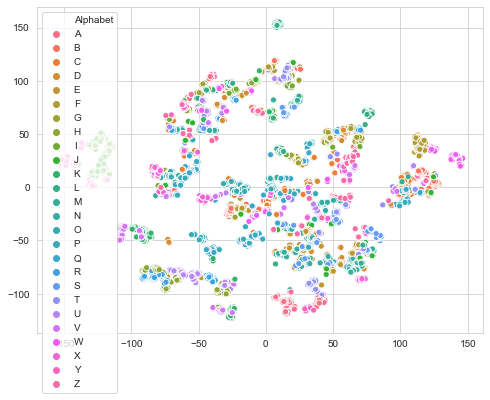

In [160]:
#APPLYING TSNE TO EMBEDD THE MULTI DIMENSIONAL SPACE TO 2D SPACE
#TSNE HELPS US TO VISUALIZE DATA IN LOWER DIMENSIONS

from sklearn.manifold import TSNE
x=TSNE(n_components=2,perplexity=50.0,learning_rate=200.0, n_iter=5000).fit_transform(data2)

fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(x[:,0],x [:,1], hue=data["Alphabet"], legend='full',ax=ax)
plt.show()

# observation of T-SNE

1.Its a bit complex and difficult to visualize 26 classes in 2D but TSNE
  did a god job if not a great job.
  
2.I have use different perplexities and different number of iteration and came 
  to this above conclusion because after this it was not changing much.

3.Now we dont have a clear picture but we can see some clusters and that is       very much interpreatble because some hand gestures are really close.

In [67]:
#making alphabet(target variable) sliced from the data
x2=data.iloc[0:5200,0:11]
x2.head()

y2=data['Alphabet']
y2.head()

print(x2.shape)
print(y2.shape)
print(data.shape)

(5200, 11)
(5200,)
(5200, 12)


# MODEL TRAINING, EVALUATION AND HYPERPARAMETER TUNING

# KNN(K nearest neighbor)

In [68]:
# knn(k nearest neighbour)
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier

tuned_parameters=[{'n_neighbors':[3,4,5,6]}]
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.3, random_state=50)
clf= KNeighborsClassifier()
modelknn=GridSearchCV( clf,tuned_parameters,scoring='f1_weighted')

modelknn.fit(X_train,y_train)

print(modelknn.best_estimator_)
print(modelknn.score(X_test,y_test))
# Fit the classifier to the data


KNeighborsClassifier(n_neighbors=3)
0.983978248347468


In [69]:
knn_test_prediction=modelknn.predict(X_test)
knn_train_predictions=modelknn.predict(X_train)

In [70]:
#evaluation
from sklearn.metrics import f1_score
X_knntest_F1score=f1_score(y_test,knn_test_prediction,average='weighted')
print("Testing f1 score is",X_knntest_F1score) #f1 score on test data

X_knntrain_F1score=f1_score(y_train,knn_train_predictions,average='weighted')
print("Training f1 score is",X_knntrain_F1score) #f1 score on train data

Testing f1 score is 0.983978248347468
Training f1 score is 0.9939506880415726


# Knn observation

1. Knn is giving us very good results, we are getting around 98% f1 score on test data.

# SVM

In [71]:
#svm(support vector machine)
from sklearn import svm
tuned_parameters=[{'n_neighbors':[3,4,5,6]}]
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.3, random_state=50)
tuned_parameters=[{'C':[0.001, 0.01, 0.1, 1, 10]}]
clf= svm.SVC(kernel='rbf')
smodel=GridSearchCV(clf,tuned_parameters,scoring='f1_weighted',cv=3)

smodel.fit(X_train,y_train)

print(smodel.best_estimator_)
print(smodel.score(X_test,y_test))
# Fit the classifier to the data

SVC(C=10)
0.6533414414104004


In [72]:
svm_test_prediction=smodel.predict(X_test)
svm_train_predictions=smodel.predict(X_train)

In [73]:
#evaluation
from sklearn.metrics import f1_score
X_svmtest_F1score=f1_score(y_test,svm_test_prediction,average='weighted')
print("Testing f1 score is",X_svmtest_F1score) #f1 score on test data

X_svmtrain_F1score=f1_score(y_train,svm_train_predictions,average='weighted')
print("Training f1 score is",X_svmtrain_F1score) #f1 score on train data

Testing f1 score is 0.6533414414104004
Training f1 score is 0.676480898697364


# SVM observation

We are getting testing f1 score of 65% which is less then k nearestneighbour.

# Logistic Regression

In [74]:
# LOGISTIC REGRESSION
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split

tuned_parameters=[{'C':[10**-4,10**-2,10**0,10**2,10**4]}]
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.2, random_state=50)

model=GridSearchCV(LogisticRegression(max_iter=600),tuned_parameters,scoring='f1_weighted')

model.fit(X_train,y_train)

print(model.best_estimator_)
print(model.score(X_test,y_test))

LogisticRegression(C=10000, max_iter=600)
0.47019066329118175


In [75]:
print(y_test.shape)
print(y_train.shape)

(1040,)
(4160,)


In [76]:
lrmodel=LogisticRegression(C=1, max_iter=600)

lrmodel.fit(X_train,y_train)


LogisticRegression(C=1, max_iter=600)

In [77]:
LR_test_prediction=lrmodel.predict(X_test)
LR_train_predictions=lrmodel.predict(X_train)

In [78]:
#evaluation of Logistic Regression 
from sklearn.metrics import f1_score
X_lrtest_F1score=f1_score(y_test,LR_test_prediction,average='weighted')
print("Testing f1 score is",X_lrtest_F1score) #f1 score on test data

X_lrtrain_F1score=f1_score(y_train,LR_train_predictions,average='weighted')
print("Training f1 score is",X_lrtrain_F1score) #f1 score on train data

Testing f1 score is 0.4717398639491559
Training f1 score is 0.4724408121321303


# LR observation

1. We got around 47% f1 score on test data which is not very good, let's try some other algorithm

# Decision Tree Claasifier

In [79]:
#decision tree classifier

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_split=5,random_state=None)
tuned_parameters=[{'max_depth':[4,5,6]}]
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.3, random_state=50)

model=GridSearchCV(clf,tuned_parameters,scoring='f1_weighted')

model.fit(X_train,y_train)

print(model.best_estimator_)
print(model.score(X_test,y_test))
print(model.score(X_train,y_train))

DecisionTreeClassifier(max_depth=6, min_samples_split=5)
0.42588665273351967
0.4502289438648717


Here i got 40% accuracy when maxdepth is 6, lets see if i increase max depth

In [80]:
clf = tree.DecisionTreeClassifier(min_samples_split=5,random_state=None)
tuned_parameters=[{'max_depth':[5,8,10]}]
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.3, random_state=50)

model=GridSearchCV(clf,tuned_parameters,scoring='f1_weighted')

model.fit(X_train,y_train)

print(model.best_estimator_)
print(model.score(X_test,y_test))
print(model.score(X_train,y_train))

DecisionTreeClassifier(max_depth=10, min_samples_split=5)
0.7347629453927103
0.7555016759745519


Increasing maxdepth is increasing accuracy and that simply means model is getting overfit

# Decision Tree observation

1. With depth 6, we were getting f1 score of 40% on test data
2. With depth 10, we are getting f1 score of 71% on test data.

# Random Forest

In [81]:
#let's use RANDOM FOREST classifier

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn import tree
clf1 = RandomForestClassifier()
tuned_parameters1=[{'n_estimators':[100,200,300]}]
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.4, random_state=50)

model=GridSearchCV(clf1,tuned_parameters1,scoring='f1_weighted')

model.fit(X_train,y_train)

print(model.best_estimator_)
print(model.score(X_test,y_test))

RandomForestClassifier(n_estimators=300)
0.995187605882291


Random Forest works fairly well on the dataset, We got an accuracy of 99.47 that is very good.

# Random Forest observation
We got an amazing weighted f1 score i.e 99.5%, this seems that we could have more data to validate this high percentage

In [83]:
#lets predict for the test data
print(X_test[0:1])

print(model.predict(X_test[0:1]))



        cosmi     cospr     cosrm         d1         d2        d3         d4  \
429  0.993597  0.997851  0.993334  70.541584  84.060595  85.96089  79.627804   

            d5         d6         d7         d8  
429  69.972969  30.277204  34.133608  27.394613  
['C']


# Explainable AI

This is a very recent field of research, Everytime we predict something using Machine Learning, it's very important to know the reasoning behind that particular predictions specially in medical and finance industry where high risks are involved.

Reasoning behind a particular predictions gives us a understanding of how and why a Machine Learning model is predicting a particular result.

Ther are 2 famous algorithms which works fine for this task:

Lime

Shap

The best part about these algorithms are that they dont care about the ML model you are working with, you can give any Ml model and these techniques will explain the reasoning behind a particular prediction.
We will use Lime for this project.

In [96]:
X_train_array=X_train.values
y_train_array=y_train.values
X_test_array=X_test.values
y_test_array=y_test.values

In [97]:
import lime
from lime import lime_tabular

explainer=lime_tabular.LimeTabularExplainer(
           training_data=np.array(X_train_array),
           feature_names=X_train.columns,
            class_names=['A','B','C','D','E',"F" ,"G" ,"H" ,"I" ,"J" ,"K","L" ,"M" ,"N" ,"O","P" ,"Q" ,"R" ,"S","T","U","V","W","X","Y","Z"],
            mode='classification')


In [111]:
exp=explainer.explain_instance(
data_row=np.array(X_test_array[0]),
predict_fn=modelknn.predict_proba)

exp.show_in_notebook(show_table=True)

In [102]:
X_test.iloc[0:1,:]

cosmi     cospr     cosrm         d1         d2        d3         d4  \
429  0.993597  0.997851  0.993334  70.541584  84.060595  85.96089  79.627804   

            d5         d6         d7         d8  
429  69.972969  30.277204  34.133608  27.394613

In [106]:
y_test.iloc[0:1]

429    C
Name: Alphabet, dtype: object

In [112]:
exp=explainer.explain_instance(
data_row=np.array(X_test_array[1]),
predict_fn=modelknn.predict_proba)

exp.show_in_notebook(show_table=True)

In [113]:
X_test.iloc[1:2,:]

cosmi     cospr     cosrm        d1         d2         d3         d4  \
4557  0.992641  0.995726  0.992824  66.65664  54.680332  39.876756  38.170444   

             d5         d6         d7        d8  
4557  75.411785  19.888172  25.059944  25.37529

In [114]:
y_test.iloc[1:2]

4557    N
Name: Alphabet, dtype: object

# Conclusion

Here there are too many classes so there is not much clarity about explaination but still if we closly observe we can find some of the answers.

Also interpretablity in this project is not very important as nobody cares what angle i am making while doing a hand gesture.

In [119]:
# lets use pretty table library to conclude things in a better way
import prettytable
from prettytable import PrettyTable
columns=(["ALGORITHM", "F1_SCORE_WEIGHTED"])
myTable = PrettyTable()
myTable.add_column(columns[0], ["KNN","SVM","Logistic Regression","Decision Tree","Random Forest "])
myTable.add_column(columns[1], [" 98%"," 65%","47%", "45%", "99%"])

print(myTable)

+---------------------+-------------------+
|      ALGORITHM      | F1_SCORE_WEIGHTED |
+---------------------+-------------------+
|         KNN         |         98%       |
|         SVM         |         65%       |
| Logistic Regression |        47%        |
|    Decision Tree    |        45%        |
|    Random Forest    |        99%        |
+---------------------+-------------------+


# Conclusion

Random forest and Knn almsot have same f1_weighted score but random forest is an ensemble technique, knn is a simple nearest neigbour technique so KNN would be a better choice, why use a complex technique when a simple technique is working fine for us.

# DEPLOYMENT

In [201]:
from sklearn.externals import joblib
import pickle as pkl

In [204]:
joblib.dump(model, 'model1.pkl')

['model1.pkl']

# Future scope

The model can be further used in various applications. 

1. One of the applications can be to use this model in various hotels and restaurants. Since all the waiters are not well known to the sign language used by the deaf and mute can help the waiters to understand their orders.

2. Other application could be Hospitals, Railway stations or any public place so that these people can be proud of their existence.

# THANKS FOR READING